In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import hsc3x2pt

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


In [4]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [64]:
#g_s1 = hsc3x2pt.galaxy_sample_source_class(['s1', 'taniguchi_project/redshift_r000_rotmat1.dat', 0.0, 0.0, 0.2, '6.6 arcmin^-2'])
g_s1 = hsc3x2pt.galaxy_sample_source_class_broad_Nz(['s1', 'taniguchi_project/redshift_r000_rotmat1.dat', 0.0, 0.0, 0.2, '6.6 arcmin^-2'])

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


In [65]:
pk2cl = hsc3x2pt.pk2cl_class(power_b1)
pk2cl.set_galaxy_sample(g_s1)

In [66]:
cosmo_dict = dict(zip(['omega_b', 'omega_c', 'Omega_de', 'ln10p10As', 'n_s', 'w_de'], [0.046*0.7**2, 0.233*0.7**2, 0.721, 3.1149, 0.97, -1]))
pk2cl.set_cosmology_from_dict(cosmo_dict)
sigma8 = pk2cl.pk_class.get_sigma8()

"""
cosmo_dict = dict(zip(['omega_b', 'omega_c', 'Omega_de', 'ln10p10As', 'n_s', 'w_de'], [0.046*0.7**2, 0.233*0.7**2, 0.64, 3.1149, 0.97, -1]))
pk2cl.set_cosmology_from_dict(cosmo_dict)
sigma8_temp = pk2cl.pk_class.get_sigma8()
ln10p10As = 3.1149 + 2*np.log(sigma8/sigma8_temp)
cosmo_dict = dict(zip(['omega_b', 'omega_c', 'Omega_de', 'ln10p10As', 'n_s', 'w_de'], [0.046*0.7**2, 0.233*0.7**2, 0.64, ln10p10As, 0.97, -1]))
pk2cl.set_cosmology_from_dict(cosmo_dict)
"""

"\ncosmo_dict = dict(zip(['omega_b', 'omega_c', 'Omega_de', 'ln10p10As', 'n_s', 'w_de'], [0.046*0.7**2, 0.233*0.7**2, 0.64, 3.1149, 0.97, -1]))\npk2cl.set_cosmology_from_dict(cosmo_dict)\nsigma8_temp = pk2cl.pk_class.get_sigma8()\nln10p10As = 3.1149 + 2*np.log(sigma8/sigma8_temp)\ncosmo_dict = dict(zip(['omega_b', 'omega_c', 'Omega_de', 'ln10p10As', 'n_s', 'w_de'], [0.046*0.7**2, 0.233*0.7**2, 0.64, ln10p10As, 0.97, -1]))\npk2cl.set_cosmology_from_dict(cosmo_dict)\n"

In [67]:
pk2cl.pk_class.get_sigma8()

0.8199861700858794

In [68]:
pk2cl.init_pk()

In [69]:
l = np.logspace(-2, 5, 1000)

In [70]:
cl = pk2cl.CEE('s1','s1',l)

In [71]:
l_takada, l2_cl_ov_2pi_takada = np.loadtxt('taniguchi_project/cl_taniguchi_corr.dat', usecols=(0,1), unpack=True)

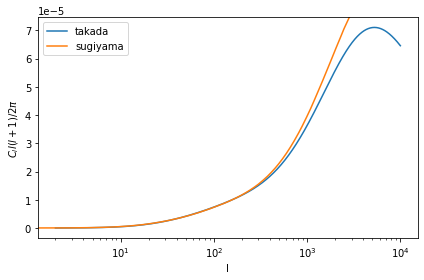

In [72]:
plt.figure()
plt.xlabel('l')
plt.ylabel(r'$C_l l(l+1)/2\pi$')
plt.xscale('log')
plt.plot(l_takada, l2_cl_ov_2pi_takada, label='takada')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot(l, cl*l*(l+1)/2.0/np.pi, label='sugiyama')
plt.legend()
plt.tight_layout()
plt.savefig('taniguchi_project/clEE_takata_sugiyama_ylin_by_sugiyamanotebook.pdf')
plt.show()

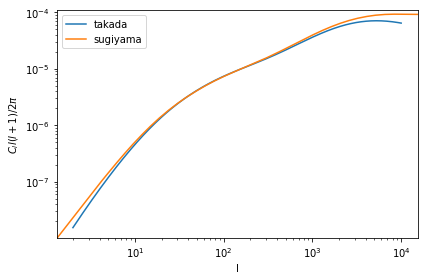

In [73]:
plt.figure()
plt.xlabel('l')
plt.ylabel(r'$C_l l(l+1)/2\pi$')
plt.xscale('log')
plt.yscale('log')
plt.plot(l_takada, l2_cl_ov_2pi_takada, label='takada')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot(l, cl*l*(l+1)/2.0/np.pi, label='sugiyama')
plt.legend()
plt.tight_layout()
plt.savefig('taniguchi_project/clEE_takata_sugiyama_ylog_by_sugiyamanotebook.pdf')
plt.show()

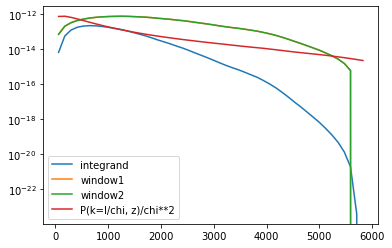

In [74]:
sample = pk2cl.galaxy_sample_dict['s1']
cl_temp = pk2cl._CEE(sample, sample, 1e3, plot=True)

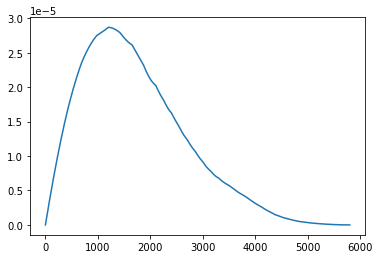

In [75]:
chi = np.linspace(0.1, 5800, 1000)
z = g_s1.chi2z(chi)

w = g_s1.window_lensing(chi,z)

plt.figure()
plt.plot(chi, w)
plt.show()

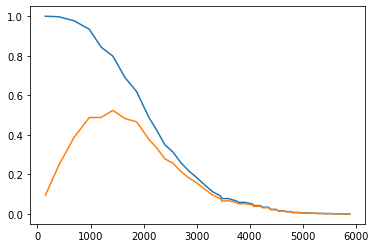

In [76]:
plt.figure()
plt.plot(g_s1.chis, g_s1.Pzs_cumsum)
plt.plot(g_s1.chis, g_s1.Pzs_ov_chizs_cumsum*g_s1.chis)
#plt.plot(g_s1.chis, g_s1.Pzs_ov_chizs_cumsum)
plt.show()